In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\a_del\OneDrive\Desktop\learningSet.csv')

In [ ]:
#Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

In [ ]:
#Check for null values in the numerical columns.

In [4]:
numerical = data.select_dtypes(np.number)

In [5]:
numerical

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [10]:
nulls_percent_data = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_data.columns = ['column_name', 'nulls_percentage']
nulls_percent_data

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


In [11]:
nulls_percent_data[nulls_percent_data['nulls_percentage'] > 0]

,column_name,nulls_percentage
3,AGE,0.248030
4,NUMCHLD,0.870184
5,INCOME,0.223096
6,WEALTH1,0.468830
8,MBCRAFT,0.553955
...,...,...
386,RAMNT_23,0.917631
387,RAMNT_24,0.814090
398,NEXTDATE,0.104526
399,TIMELAG,0.104526


In [ ]:
#ince we are interested only in the following columns: GEOCODE2, WEALTH1, ADI, DMA,and MSA

In [12]:
nulls_percent_data[(nulls_percent_data.column_name.isin(["GEOCODE2","WEALTH1","ADI", "DMA", "MSA"]))]

,column_name,nulls_percentage
6,WEALTH1,0.468830
150,MSA,0.001383
151,ADI,0.001383
152,DMA,0.001383


In [ ]:
#Starting the cleaning of column GEOCODE2

In [14]:
data['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

In [15]:
data['GEOCODE2'].isna().sum()/len(list(data['GEOCODE2']))

0.001383473776883411

In [16]:
data['GEOCODE2'].unique()

array(['C', 'A', 'D', 'B', ' ', nan], dtype=object)

In [ ]:
#filling up whitespaces

In [17]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [18]:
data = data.dropna(subset = ['GEOCODE2'])

In [19]:
data['GEOCODE2'].isna().sum()/len(list(data['GEOCODE2']))

0.0

In [ ]:
#Starting the cleaning of column WEALTH1

In [20]:
data['WEALTH1'].unique()

array([nan,  9.,  1.,  4.,  2.,  6.,  0.,  5.,  8.,  3.,  7.])

In [21]:
data['WEALTH1'].isna().sum()/len(list(data['WEALTH1']))

0.4677000410124825

In [25]:
data["WEALTH1"]=data["WEALTH1"].fillna("9.0")

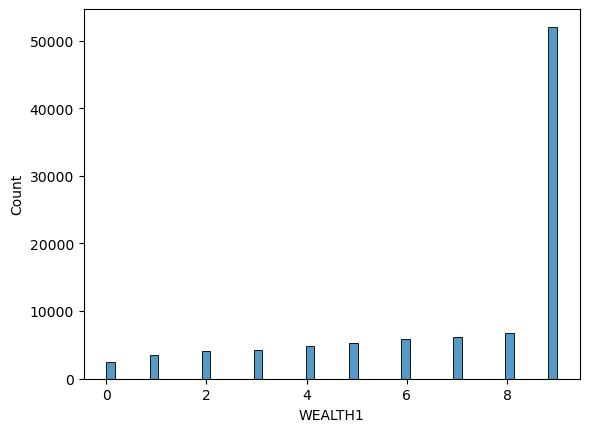

In [26]:
sns.histplot(data['WEALTH1']) 
plt.show()

In [23]:
#Starting the cleaning of column ADI

In [27]:
data['ADI'].value_counts(dropna = False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64

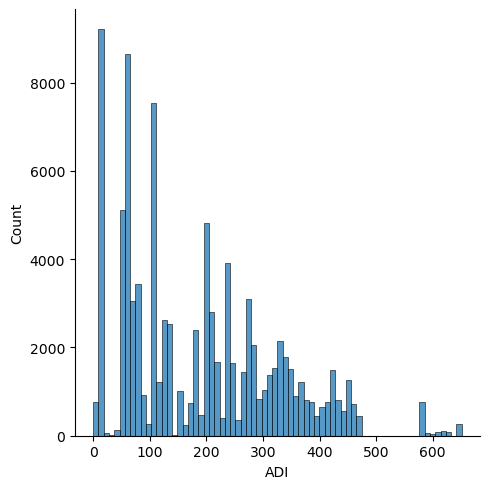

In [28]:
sns.displot(data['ADI']) 
plt.show()

In [ ]:
#Perhaps the values above 600 can be dropped?

<Axes: >

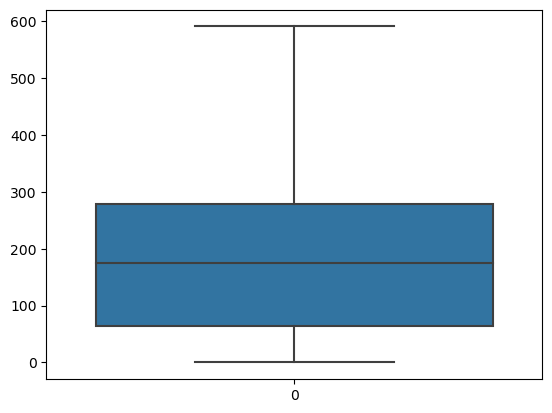

In [29]:
data1 = data[data['ADI'] < 600]

sns.boxplot(data1['ADI'])

In [ ]:
#Starting the cleaning of column DMA

<Axes: xlabel='DMA', ylabel='Count'>

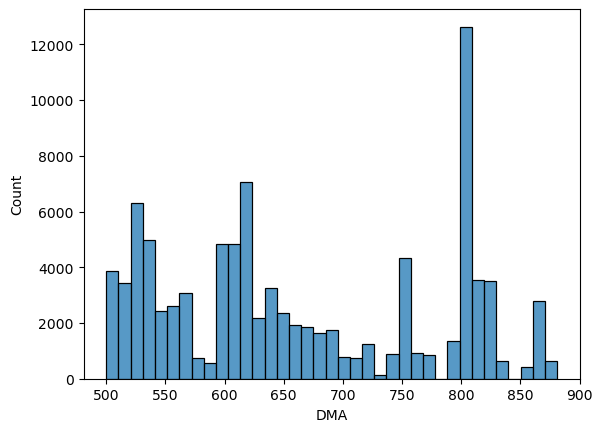

In [30]:
sns.histplot(data["DMA"])

In [31]:
data["DMA"].isna().sum()/len(data["DMA"])

0.0

In [32]:
data["DMA"]=data["DMA"].fillna(round(data["DMA"].mean()))

In [34]:
#Starting the cleaning of column MSA

In [35]:
data["MSA"].value_counts()

0.0       21146
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 298, dtype: int64

In [36]:
data["MSA"].isna().sum()/len(data["MSA"])

0.0

In [37]:
data["MSA"]=data["MSA"].fillna(round(data["MSA"].mean()))

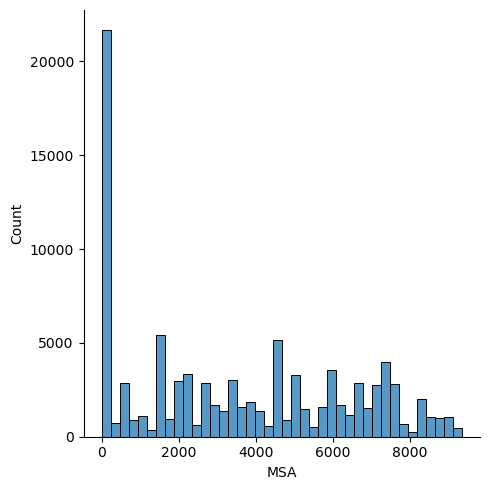

In [38]:
sns.displot(data['MSA'])
plt.show()